In [1]:
#Import Neccessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import countplot,distplot

In [2]:
#Loading the dataset using pandas read_csv 
df=pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Data Exploration and Data Cleaning 

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

This dataset describes the medical records for Pima Indian women 
and whether or not each patient will have an onset of diabetes in future 

Parameters are 

* Pregnancies = Number of times pregnant
* Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure = Diastolic blood pressure (mm Hg)
* SkinThickness	 = Triceps skin fold thickness (mm)
* Insulin = 2-Hour serum insulin (mu U/ml)
* BMI = Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction = Diabetes pedigree function
* Age = Age (years)
* Class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [5]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Class  
0                       0.627   5

In [6]:
df.shape
# We have 768 Rows and 9 columns 

(768, 9)

In [7]:
#Lets check if there is any null or missing values 
df.isnull().values.any()

False

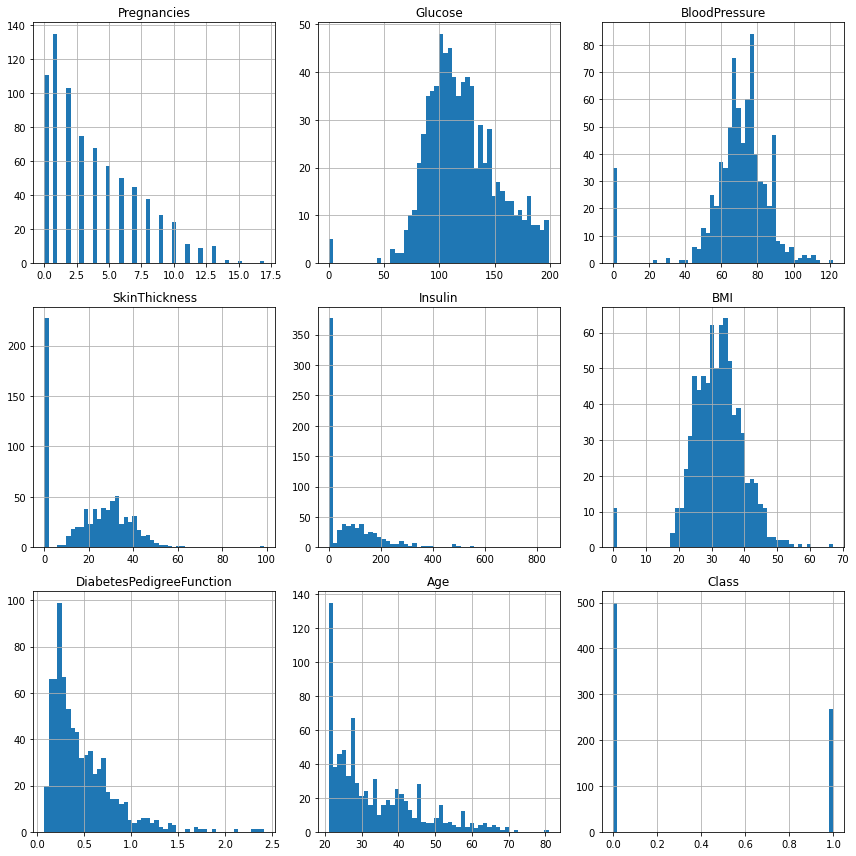

In [8]:
df.hist(figsize=(12,12),bins=50)
plt.tight_layout()

/home/ka/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


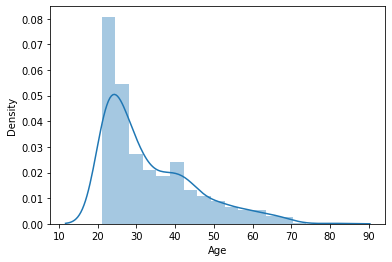

In [9]:
distplot(df['Age']);

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

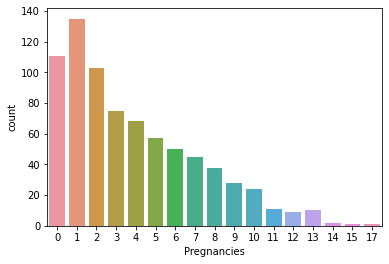

In [10]:
countplot(x="Pregnancies", data=df)

## We can procced without any worries after data exploration we have neither missing values nor Categorical Values to encode

In [11]:
X=df.iloc[: ,0:8].values
Y=df.iloc[: , -1].values

In [12]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [13]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### We have to split the dataset for training and testing 

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.15,random_state=73)

### The data is now ready to be trained so lets train it first with Desicion Tree and then Random Forest and comapre later

In [15]:
from sklearn.model_selection import validation_curve

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier


In [17]:
Des_model=DecisionTreeClassifier(max_leaf_nodes=5,min_samples_leaf=3,criterion = 'entropy', random_state = 1) #“entropy” for the information gain.
Des_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5,
                       min_samples_leaf=3, random_state=1)

In [18]:
Des_model.score(X_test,Y_test)

0.7413793103448276

## RandomForest 

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
R_train_scoreNum, R_test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = Y_train, 
                                param_name = 'n_estimators', 
                                param_range =  [100, 300, 500], cv = 3)

In [21]:
Rf_model=RandomForestClassifier(random_state = 1,n_estimators = 500,max_depth = 5,min_samples_split = 5,min_samples_leaf = 1)
Rf_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=500,
                       random_state=1)

In [22]:
Rf_model.score(X_test,Y_test)

0.7931034482758621

We have compared Desicion Tree and RandomForestClassifier and RandomForest has given us better accuracy 